In [1]:
# Exploratory Data Analysis of the Titanic Dataset

## Loading the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Titanic Dataset

In [2]:
# Loading the Titanic dataset
titanic = pd.read_csv("titanic.csv")


# Understanding the dataset:
The overall knowhow of the Titanic dataset is given as below:

In [3]:
# Understanding the dataset
print(titanic.info())
print(titanic.head(10))
print(titanic.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         

# Transforming to convinient data types:

In [4]:
# Transforming to convenient data types
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']
titanic[categorical_cols] = titanic[categorical_cols].astype('category')
titanic['PassengerId'] = titanic['PassengerId'].astype(str)
titanic['SibSp'] = titanic['SibSp'].astype(int)


# Summary Statistics:

In [5]:
# Summary Statistics
print(titanic.describe())

              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


# Checking for missing values:

In [6]:
# Checking for missing values
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Handling Missing Values Using mean and mode imputation methode.

In [7]:
# Handling Missing Values
def get_mode(v):
    return v.value_counts().index[0]

titanic_2 = titanic.copy()
for col in titanic_2.columns:
    if titanic_2[col].dtype.name == 'category':
        titanic_2[col] = titanic_2[col].fillna(titanic_2[col].mode()[0])
    elif titanic_2[col].dtype.name in ['int64', 'float64']:
        titanic_2[col] = titanic_2[col].fillna(titanic_2[col].mean())
    else:
        titanic_2[col] = titanic_2[col].fillna(get_mode(titanic_2[col]))

print(titanic_2.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# Hundling Outliers by lower bound and upper bound:

In [8]:
# Handling Outliers
def identify_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    return ((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR)))

def count_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outliers_count = df[numeric_cols].apply(lambda col: sum(identify_outliers(col)))
    return outliers_count

print(count_outliers(titanic_2))
def handle_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return x.clip(lower_bound, upper_bound)

titanic_3 = titanic_2.copy()
numeric_cols = titanic_3.select_dtypes(include=[np.number]).columns
titanic_3[numeric_cols] = titanic_3[numeric_cols].apply(handle_outliers)


Age       66
SibSp     46
Parch    213
Fare     116
dtype: int64


# Checking the Outliers after Handlimg for the numeric columns:

In [9]:
print(count_outliers(titanic_3))

Age      0
SibSp    0
Parch    0
Fare     0
dtype: int64


# Data Cleaning:  
Removing Duplicates

In [10]:
# Data Cleaning: Removing Duplicates
dup = titanic_3.duplicated()
print(titanic_3[dup])

titanic_3 = titanic_3.drop_duplicates()


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


# 2) Visualization of Titanic Dataset:
###  2.1) Bar garph of Survival status by Sex:

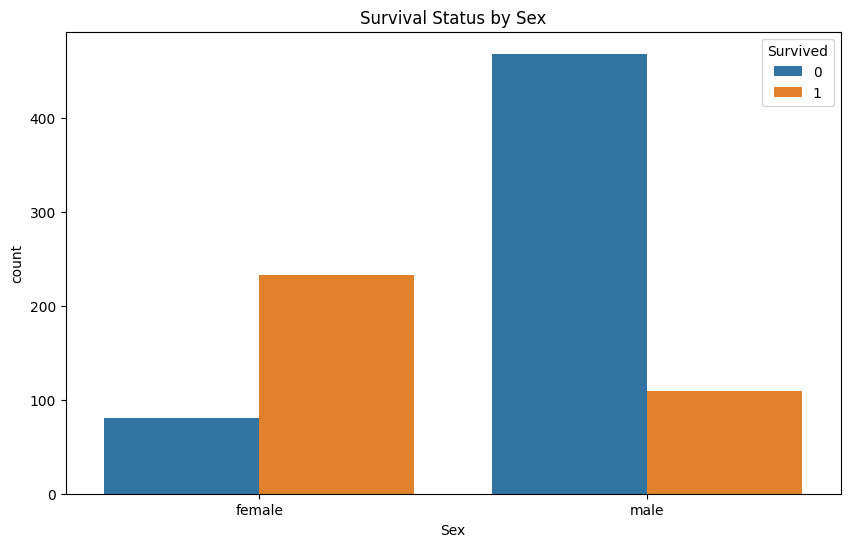

In [11]:
# Bar graph of Survival status by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_3)
plt.title('Survival Status by Sex')
plt.show()

### Description of the graph:
The graph shows the survival status by sex of passengers on the Titanic. The y-axis is “Count” and the x-axis is “Survival Status.” There were significantly more men who did not survive than women.

# 2.2) Bar garph of Survival status by Econemic class:

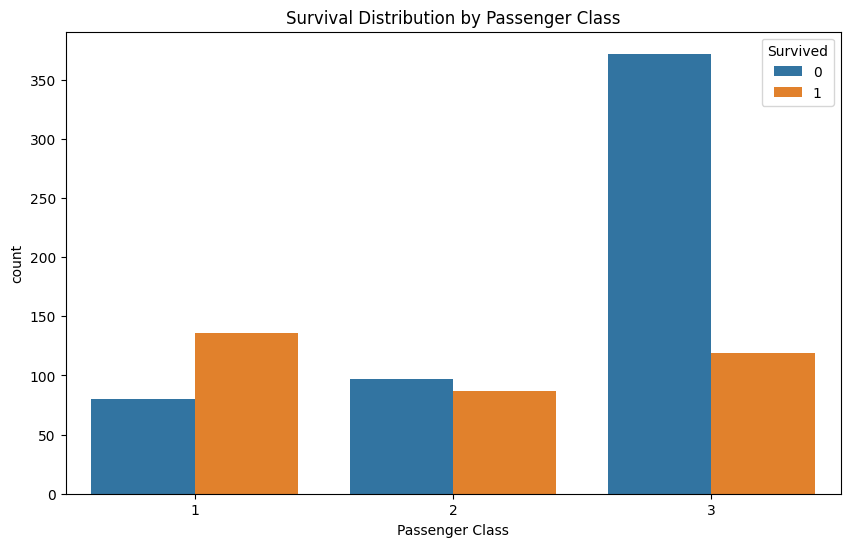

In [14]:
# Bar graph of Survival status by Economic class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_3)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.show()

# Description of the graph:
The graph shows that a much higher percentage of passengers in first class survived than passengers in second or third class. This is likely because first class passengers had better access to lifeboats.

Passengers in first class had the highest survival rate, with around 200 survivors. Passengers in second class had a lower survival rate, with around 100 survivors. Passengers in third class had the lowest survival rate, with around 50 survivors.

# 2.3) Histogram of Age distribution by Survival status:

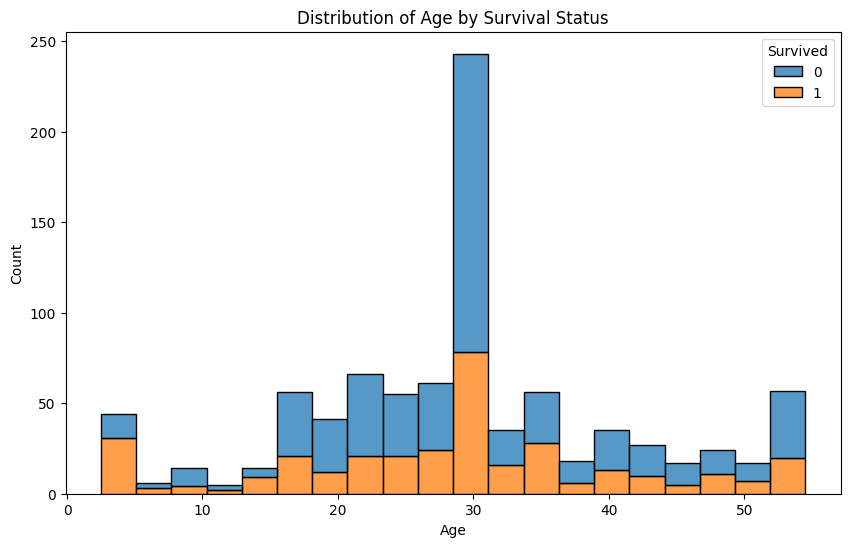

In [15]:
# Histogram of Age distribution by Survival status
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_3, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Distribution of Age by Survival Status')
plt.show()

# Description of the graph:
The main insight of the graph is that there is a clear correlation between age and survival. Children (under 20) and women (likely of child-bearing age) had a significantly higher survival rate than men. This is likely because women and children were given priority when loading the lifeboats.

Here are some additional observations from the graph:

The survival rate for infants appears to be very high. The survival rate for men increases slightly as age increases. It is difficult to say definitively from this graph what the survival rate was for people over 60.

# 2.4) Ferequency polygon of Survival status by Age:

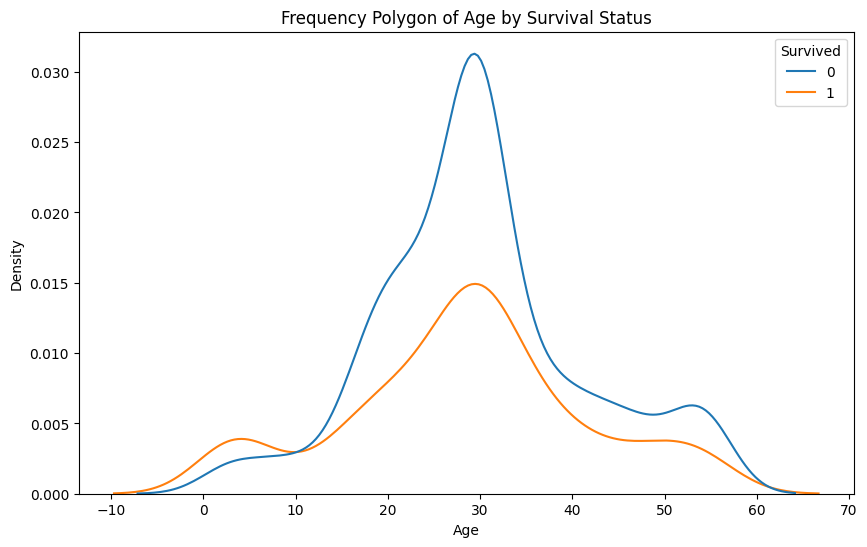

In [16]:
# Frequency polygon of Survival status by Age
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic_3, x='Age', hue='Survived')
plt.title('Frequency Polygon of Age by Survival Status')
plt.show()

## Description:
The graph shows a frequency polygon of age by survival status on the Titanic. The red line represents the number of survivors, while the green line represents the number of those who did not survive.

The key insight is that age appears to be a factor in survival. Children (under 25) and possibly women (of child-bearing age) had a higher survival rate than men. This is likely because women and children were given priority when boarding lifeboats.

# 2.5) Ogive (Cumulative Ferequency polygon) of Survival status by Age:

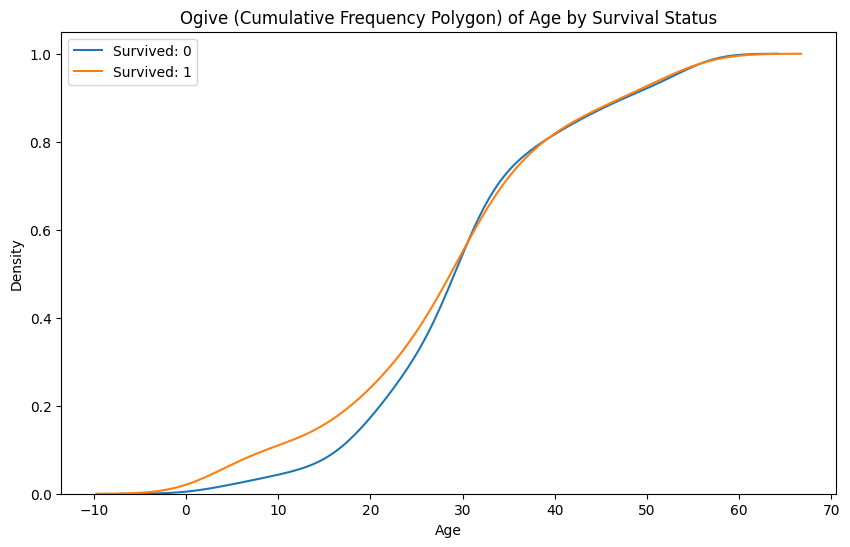

In [17]:
# Ogive (Cumulative Frequency polygon) of Survival status by Age
plt.figure(figsize=(10, 6))
for survived in [0, 1]:
    sns.kdeplot(data=titanic_3[titanic_3['Survived'] == survived], x='Age', cumulative=True, label=f'Survived: {survived}')
plt.title('Ogive (Cumulative Frequency Polygon) of Age by Survival Status')
plt.legend()
plt.show()

## Description:
The cumulative frequency polygon shows the number of survivors on the Titanic by age.

As we can see from the graph:

Children had a very high survival rate. The curve increases sharply at young ages, which means that a large number of children survived the disaster. Survival rates were lower for adults of all ages. The curve increases more gradually between the ages of 20 and 80.

# 2.6) Scatter plot of Age vs Fare:

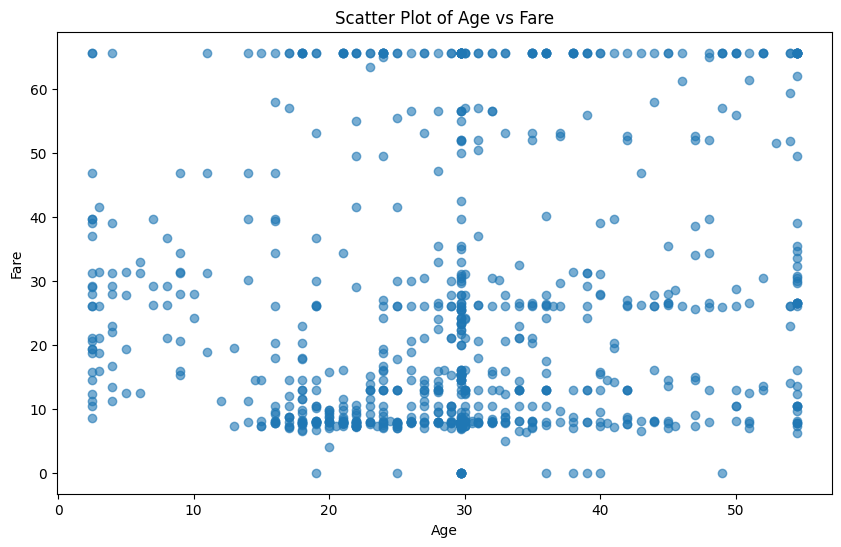

In [18]:
# Scatter plot of Age vs Fare
plt.figure(figsize=(10, 6))
plt.scatter(titanic_3['Age'], titanic_3['Fare'], alpha=0.6)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

## Description:
The scatter plot shows a positive correlation between age and fare. This means that as the age of the passenger increases, the fare they paid also tends to increase. The general upward trend suggests that older passengers tended to pay more for their tickets. There are a few data points that fall below the overall trend line. This means that some younger passengers paid a higher fare than some older passengers.

# 2.7) Boxplot of Fare by Passenger Class:

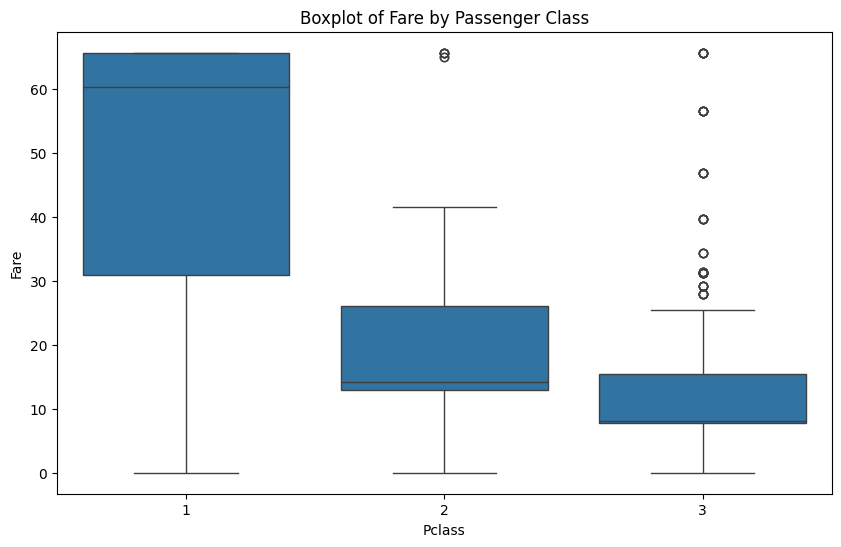

In [19]:
# Boxplot of Fare by Passenger Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_3)
plt.title('Boxplot of Fare by Passenger Class')
plt.show()

## Description of the Graph:
As we can see from the graph there is a significant difference in fares between the three passenger classes. First class passengers paid the most for their tickets, with a median fare of around £75. Second class passengers paid a median fare of around £14. Third class passengers paid the least, with a median fare of around £8. The spread of fares was much higher in first class than in second or third class. There were a few outliers in the first and third class fares. This graph suggests that social class was a major factor in determining how much passengers paid for their tickets on the Titanic.

# 2.8) Piechart of Embarked of ports:

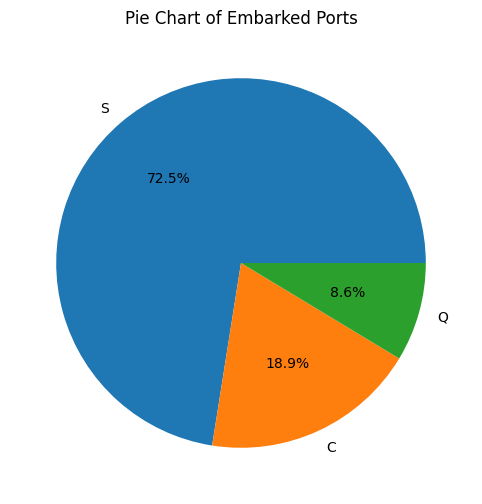

In [20]:
# Piechart of Embarked ports
embarked_counts = titanic_3['Embarked'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Embarked Ports')
plt.show()

# Description of the graph:
The pie chart illustrates the distribution of passengers by their embarkation ports of the Titanic dataset. Southampton was the primary port of embarkation for the majority of the Titanic’s passengers, with 72.4% of them boarding from this port. Cherbourg was the second most common port, with 18.9% of passengers boarding there. Queenstown had the fewest passengers boarding, making up 8.7% of the total. This distribution suggests that the Titanic was significantly more populated by passengers from Southampton, with a smaller but notable number from Cherbourg and the fewest from Queenstown.

# 2.9) The Line plot of Average Fare of each Pclass:

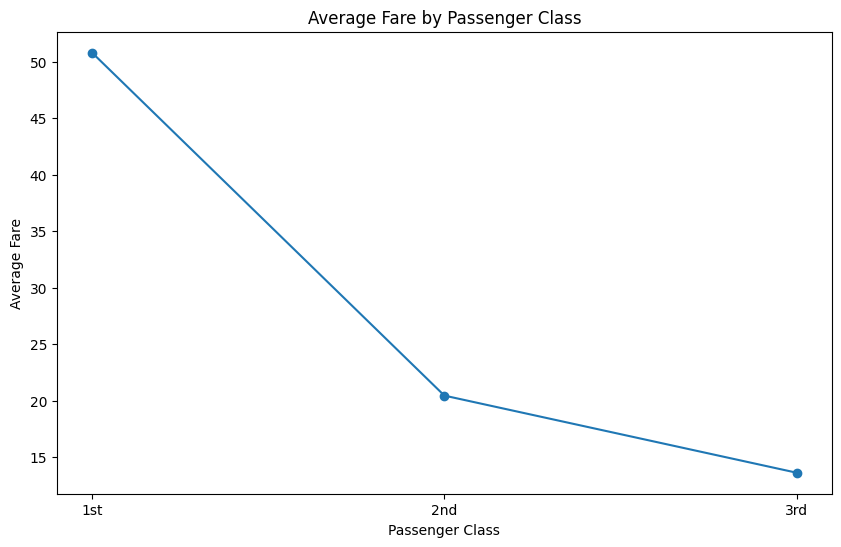

In [21]:
# Line plot of Average Fare of each Pclass
avg_fare = titanic_3.groupby('Pclass')['Fare'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_fare.index, avg_fare.values, marker='o')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks([1, 2, 3], ['1st', '2nd', '3rd'])
plt.show()

## Description:
This graph shows the average fare paid by passengers in different classes on the Titanic. Which shows that:

There are three passenger classes represented: 1st, 2nd, and 3rd class. There’s a clear downward trend in average fare as we move from 1st to 3rd class. 1st class passengers paid the highest average fare, around 100 units (likely in pounds or dollars). 2nd class passengers paid an average fare of about 50 units, roughly half of what 1st class paid. 3rd class passengers paid the lowest average fare, approximately 25 units. The decrease in fare is not linear. There’s a steeper drop between 1st and 2nd class compared to the drop between 2nd and 3rd class.

# 3) Generating Summary of statistics:
## 3.1 Finding Measures of Centeral tendency:
**Calculating Mean:**
The mean (or average) of a set of numbers is calculated by summing all the numbers in the set and then dividing by the count of the numbers.

In [22]:
# Measures of Central Tendency
print("Mean Fare:", titanic_3['Fare'].mean())
print("Median Fare:", titanic_3['Fare'].median())
print("Mode Fare:", titanic_3['Fare'].mode()[0])

Mean Fare: 24.04681335578002
Median Fare: 14.4542
Mode Fare: 65.6344


$$
\text{Mean} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
  
  
$$
\text{Median} = 
\begin{cases} 
x_{\left(\frac{n+1}{2}\right)}, & \text{if } n \text{ is odd} \\
\frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2} + 1\right)}}{2}, & \text{if } n \text{ is even}
\end{cases}
$$
  
  
$$
\text{Mode} = \text{value with highest frequency in the dataset}
$$

# 3.2) Finding Measures of Distribution:  

## Percentile:

$$
P_p = x_{\left(\frac{pn}{100}\right)}
$$

In [ ]:
# Measures of Distribution
print("90th Percentile of Fare:", titanic_3['Fare'].quantile(0.9))

## Decile:
Deciles are specific percentiles that divide a dataset into ten equal parts. To calculate deciles in R, you can use the quantile() function and specify the desired probabilities (percentiles).

$$
D_k = x_{\left(\frac{kn}{10}\right)}
$$

In [26]:

print("Deciles of Fare:\n", titanic_3['Fare'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

Deciles of Fare:
 0.1     7.5500
0.2     7.8542
0.3     8.0500
0.4    10.5000
0.5    14.4542
0.6    21.6792
0.7    27.0000
0.8    39.6875
0.9    65.6344
Name: Fare, dtype: float64



## Quartiles:
Quartiles divide a dataset into four equal parts. In statistics and data analysis, quartiles are often used to understand the distribution of data.

$$
Q1 = x_{\left(\frac{n+1}{4}\right)}, \quad Q2 = x_{\left(\frac{n+1}{2}\right)}, \quad Q3 = x_{\left(\frac{3(n+1)}{4}\right)}
$$

In [27]:
print("Quartiles of Fare:\n", titanic_3['Fare'].quantile([0.25, 0.5, 0.75]))

Quartiles of Fare:
 0.25     7.9104
0.50    14.4542
0.75    31.0000
Name: Fare, dtype: float64


# 3.2) Calculating Measures of dispursion:
## Range:
The range in statistics refers to the difference between the maximum and minimum values in a dataset.
$$
\text{Range} = \text{Max}(x) - \text{Min}(x)
$$

## Standard Deviation:
Standard deviation is a measure of the amount of variation or dispersion in a set of values. In statistics, it is used to quantify the amount of variation or dispersion of a set of data values.

$$
\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
$$

## Variance:
Variance is another measure of dispersion that quantifies how much a set of numbers deviates from the mean.
$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2
$$

## Quartiles Deviation:
Quartile deviation is a measure of dispersion similar to the standard deviation, but it uses quartiles instead of the mean. It is calculated as half the difference between the third quartile (Q3) and the first quartile (Q1).
$$
\text{QD} = \frac{Q3 - Q1}{2}
$$

## IQR:
The Interquartile Range (IQR) is a measure of statistical dispersion, which is defined as the difference between the third quartile (Q3) and the first quartile (Q1). It is often used to describe the spread of data and is less sensitive to outliers compared to the range.

$$
\text{IQR} = Q_3 - Q_1
$$
## Coefficient of Variation:
The coefficient of variation (CV), also known as relative standard deviation, is a standardized measure of dispersion of a probability distribution or frequency distribution. It expresses the standard deviation as a percentage of the mean.
$$
\text{CV} = \left( \frac{\sigma}{\mu} \right) \times 100\%
$$


In [28]:
# Measures of Dispersion
print("Range of Fare:", titanic_3['Fare'].max() - titanic_3['Fare'].min())
print("Standard Deviation of Fare:", titanic_3['Fare'].std())
print("Variance of Fare:", titanic_3['Fare'].var())
print("Quartile Deviation of Fare:", (titanic_3['Fare'].quantile(0.75) - titanic_3['Fare'].quantile(0.25)) / 2)
print("IQR of Fare:", titanic_3['Fare'].quantile(0.75) - titanic_3['Fare'].quantile(0.25))
print("Coefficient of Variation of Fare:", (titanic_3['Fare'].std() / titanic_3['Fare'].mean()) * 100)


Range of Fare: 65.6344
Standard Deviation of Fare: 20.481624525812144
Variance of Fare: 419.49694321634956
Quartile Deviation of Fare: 11.5448
IQR of Fare: 23.0896
Coefficient of Variation of Fare: 85.17396555951174


### Skewness using moments:
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In [29]:
# Skewness and Kurtosis
print("Skewness of Fare:", titanic_3['Fare'].skew())
print("Kurtosis of Fare:", titanic_3['Fare'].kurtosis())

Skewness of Fare: 1.082178592000912
Kurtosis of Fare: -0.24897754566009356


Mathematically given as:
The formula for skewness using moments is:
$$
\text{Skewness} = \frac{E[(X - \mu)^3]}{\sigma^3}
$$

Where: - E
 denotes the expected value (mean). - X
 is the random variable. - μ
 is the mean of the distribution. - σ
 is the standard deviation of the distribution.

## Interpretation:
Kurtosis < 3: Indicates a platykurtic distribution, which has lighter tails and a flatter peak compared to a normal distribution. Kurtosis = 3: Indicates a mesokurtic distribution, which is the kurtosis of a normal distribution. Kurtosis > 3: Indicates a leptokurtic distribution, which has heavier tails and a sharper peak compared to a normal distribution.

## Skewness using Quartiles:
Skewness can also be estimated using quartiles, specifically by comparing the positions of the quartiles relative to the median. This is a non-parametric measure of skewness that can be useful when dealing with data that may not be normally distributed.
The formula for skewness using quartiles is:

$$
\text{Skewness} = \frac{(Q3 + Q1 - 2Q2)}{(Q3 - Q1)}
$$

## Kurtosis Using moments:
Kurtosis is a measure of the “tailedness” of the probability distribution of a real-valued random variable.
The formula for kurtosis using moments is:

$$
\text{Kurtosis} = \frac{E[(X - \mu)^4]}{\sigma^4}
$$

Where:
- \( E \) denotes the expected value (mean).
- \( X \) is the random variable.
- \( \mu \) is the mean of the distribution.
- \( \sigma \) is the standard deviation of the distribution.

## Interpretation:
Kurtosis < 3: Indicates a platykurtic distribution, which has lighter tails and a flatter peak compared to a normal distribution.
Kurtosis = 3: Indicates a mesokurtic distribution, which is the kurtosis of a normal distribution.
Kurtosis > 3: Indicates a leptokurtic distribution, which has heavier tails and a sharper peak compared to a normal distribution.

## Pearson Correlation Coeffient:
The Pearson correlation coefficient (also known as Pearson’s 𝑟 r) measures the linear correlation between two variables. It ranges from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.



In [30]:
# Pearson Correlation Coefficient
print("Correlation between Fare and Age:", titanic_3['Fare'].corr(titanic_3['Age']))

Correlation between Fare and Age: 0.13749824151245854


The formula for the Pearson correlation coefficient \( r \) is:
$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$$

Where:
- \( X_i \) and \( Y_i \) are the individual sample points.
- \( \bar{X} \) and \( \bar{Y} \) are the means of the \( X \) and \( Y \) variables.

# 3.3) Linear Regression on the Titanic Dataset:
you can perform a linear regression on the Titanic dataset. While logistic regression is more appropriate and commonly used, we use linear regression model by adjusting some of the data types so as to predict the survival based on the other features.

Intercept: 0.4837526250394849
Coefficient: -0.0026125409170590108
Mean Squared Error: 0.23975625061382608


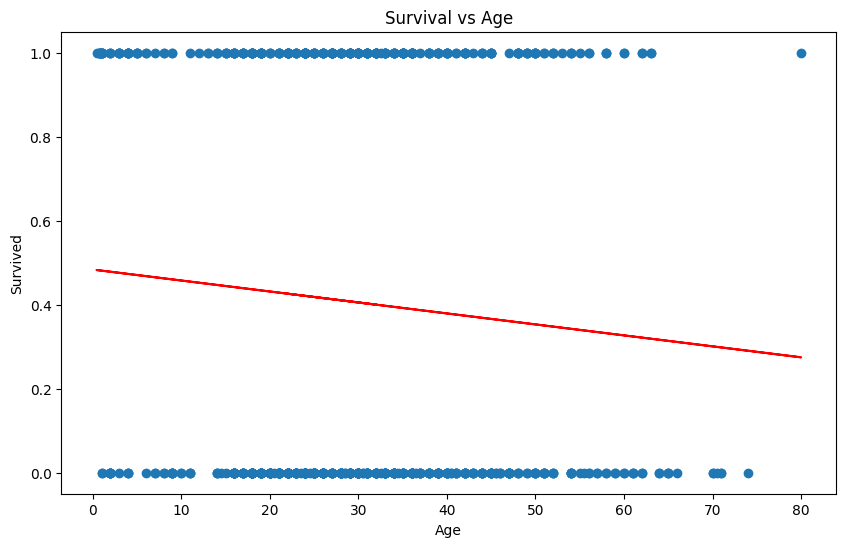

In [31]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

titanic_4 = titanic.copy()
titanic_4['Survived'] = titanic_4['Survived'].astype(int)
titanic_4['Pclass'] = titanic_4['Pclass'].astype(int)
titanic_4['Age'] = titanic_4['Age'].astype(float)

titanic_clean = titanic_4.dropna(subset=['Age'])

X = titanic_clean[['Age']]
y = titanic_clean['Survived']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('Survival vs Age')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

## Description:
This graph illustrates the relationship between age and survival rates on the Titanic.

X-axis (Age): Ranges from 0 to 80 years old. Y-axis (Survived): Binary outcome where 1.00 represents survival and 0.00 represents non-survival. Red line: This is a trend line showing the probability of survival based on age. It slopes downward from left to right, indicating that as age increases, the probability of survival generally decreases. Gray shaded area: This represents the confidence interval around the trend line. It widens at the extremes of age, indicating less certainty in the prediction for very young and very old passengers. Black dots: These represent individual passengers. Dots at 1.00 are survivors, while dots at 0.00 are non-survivors.

Overall trend: There’s a negative correlation between age and survival probability. Younger passengers had a higher chance of survival.

## Thanks!